In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
#https://drive.google.com/file/d/1cZIJoDxRlYGIlbnQwlGVuxOsy193-DbG/view?usp=drive_link

file_id = '1cZIJoDxRlYGIlbnQwlGVuxOsy193-DbG'
link = f'https://drive.google.com/uc?id={file_id}'
data =  pd.read_csv(link)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<ipython-input-8-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

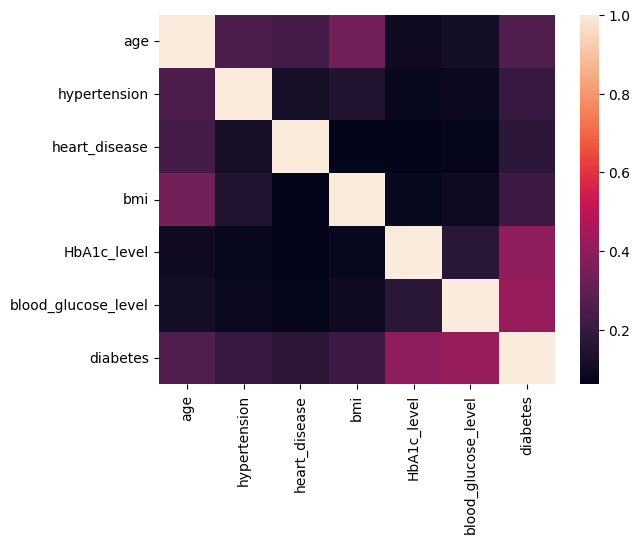

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [ ]:
data = data.drop('gender', axis=1)
data = data.drop('smoking_history', axis=1)

In [ ]:
X= data.drop('diabetes', axis = 1)
Y= data['diabetes']

In [ ]:
print(X)

        age  hypertension  heart_disease    bmi  HbA1c_level  \
0      80.0             0              1  25.19          6.6   
1      54.0             0              0  27.32          6.6   
2      28.0             0              0  27.32          5.7   
3      36.0             0              0  23.45          5.0   
4      76.0             1              1  20.14          4.8   
...     ...           ...            ...    ...          ...   
99995  80.0             0              0  27.32          6.2   
99996   2.0             0              0  17.37          6.5   
99997  66.0             0              0  27.83          5.7   
99998  24.0             0              0  35.42          4.0   
99999  57.0             0              0  22.43          6.6   

       blood_glucose_level  
0                      140  
1                       80  
2                      158  
3                      155  
4                      155  
...                    ...  
99995                   90  

Standardization and Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X = standardized_data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_test.shape, X_train.shape)

(100000, 6) (20000, 6) (80000, 6)


In [ ]:
#model creation

classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
# accuracy score
train_pred = classifier.predict(X_train)
accuracy = accuracy_score(train_pred, Y_train)

In [ ]:
print("Accuracy score of train data = {}". format(accuracy))

Accuracy score of train data = 0.9604


In [ ]:
test_pred = classifier.predict(X_test)
accuracy2 = accuracy_score(test_pred, Y_test)

In [ ]:
print("Accuracy score of test data = {}". format(accuracy2))

Accuracy score of test data = 0.96105


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18300
           1       0.92      0.60      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.94      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [ ]:
import pickle
pickle.dump(classifier, open('Practical.pkl','wb'))